<a href="https://colab.research.google.com/github/sundarjhu/UACJ_Jornada2021/blob/main/Imagenes_UACJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
__author__ = 'Aida Wofford <awofford@astro.unam.mx>, Sundar Srinivasan <s.srinivasan@irya.unam.mx>'
__version__ = '20210421'
__datasets__ = ['HST']  # datasets used in this notebook
__keywords__ = ['UACJ Workshop 2021', 'HST', 'image', 'colour composite'], # keywords relevant to this notebook

In [2]:
import warnings, numpy as np
warnings.filterwarnings("ignore", category = np.VisibleDeprecationWarning)
try:
  from astroquery.sdss import SDSS
except:
  !pip install astroquery
  from astroquery.sdss import SDSS

# Baja las imagenes de HST

Carga los paquetes necesarios.

In [3]:
from astroquery.mast import Observations
import os, requests, shutil, tempfile
#Create temporary folder if it doesn't already exist.
if not(os.path.exists("/content/UACJ/")):
  #os.makedirs("/content/UACJ/")
  %mkdir "/content/UACJ/"

Obtén la información relevante de las imágenes.

In [4]:
obs_table = Observations.query_criteria(project = "HST", 
                                        target_name = "KISSR298", 
                                        proposal_id = 12951, 
                                        instrument_name = "WFC3/UVIS")
print(obs_table['filters', 'dataURL'])

filters               dataURL              
------- -----------------------------------
  F621M mast:HST/product/ic30a2010_drz.fits
 FQ508N mast:HST/product/ic30a2020_drz.fits
  F680N mast:HST/product/ic30a2030_drz.fits


Baja las imágenes de HST del archivo de datos astronómicos obtenidos por telescopios espaciales con participación de la NASA, "Mikulski Archive at Space Telescope (MAST)".
Crearemos un directorio temporal para almacenar y acceder a estas imágenes. Esta carpeta se eliminará al final de la sesión con el comando final.

In [5]:
url = "https://mast.stsci.edu/api/v0.1/Download/file?uri=" #Base url to MAST
for dataURL, filter in zip(obs_table['dataURL'], obs_table['filters']):
  temp_filename = tempfile.gettempdir() + dataURL.split('/')[-1]
  with requests.get(url + dataURL, stream = True) as r:
    with open(temp_filename, 'wb') as f:
      shutil.copyfileobj(r.raw, f)
  print("Downloading data for filter {} into {}".format(filter, '/content/UACJ/KISSR298_' + filter + '_drz.fits'))
  shutil.move(temp_filename, '/content/UACJ/KISSR298_' + filter + '_drz.fits', copy_function = shutil.copy)

Guarda los nombres de los archivos en variables para su uso posterior.

In [6]:
f621='/content/UACJ/KISSR298_F621M_drz.fits'
f508='/content/UACJ/KISSR298_FQ508N_drz.fits'
f680='/content/UACJ/KISSR298_F680N_drz.fits'

# Archivos tipo FITS (Flexible Image Transport System).

Los archivos fits son un modo de almacenamiento de imágnes o datos en formato binario. Un archivo fits puede contener uno o varios "cajones". Algunos de los cajones contienen resumenes de los datos o encabezados.

Las imágenes se almacenan como archivos tipo FITS binarios. Nuestra primera tarea es aprender a importar, analizar y visualizar las imágenes. Una búsqueda rápida en Google nos lleva a la documentación de AstroPy.

In [7]:
from astropy.io import fits
import numpy as np

El componente de más alto nivel de la estructura FITS es la Unidad de Datos de Encabezado (HDU, Header Dada Unit). El comando fits.open () devuelve un objeto HDUList.

In [8]:
# Header Data Unit List
hdul = fits.open(f621)

HDUList.info() resume el contenido del archivo FITS abierto. Podemos utilizar esto para comprobar que hemos cargado correctamente una imagen y averiguar su formato y dimensiones.

In [9]:
# resumir el contenido del archivo FITS abierto
hdul.info()

Filename: /content/UACJ/KISSR298_F621M_drz.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     831   ()      
  1  SCI           1 ImageHDU        91   (2048, 2169)   float32   
  2  WHT           1 ImageHDU        45   (2048, 2169)   float32   
  3  CTX           1 ImageHDU        40   (2048, 2169)   int32   
  4  HDRTAB        1 BinTableHDU    559   3R x 275C   [9A, 3A, K, D, D, D, D, D, D, D, D, D, D, D, D, K, 14A, 9A, 7A, 18A, 4A, D, D, D, D, 3A, D, D, D, D, D, D, D, D, D, D, D, D, K, K, 8A, 23A, D, D, D, D, K, K, 8A, 23A, 9A, 18A, 1A, K, D, D, D, K, K, K, K, 23A, D, D, D, D, K, K, 4A, 3A, 4A, L, D, D, D, 23A, 1A, K, D, D, D, 4A, 1A, 12A, 12A, 8A, 23A, D, D, 10A, 10A, D, D, D, 4A, 3A, 3A, 4A, 8A, 7A, D, K, D, 6A, 9A, 8A, D, D, 4A, 18A, 3A, K, 5A, 3A, D, 10A, 8A, 8A, 23A, D, D, D, 3A, 1A, D, 23A, D, D, D, 3A, L, 1A, 4A, D, 3A, 6A, D, D, D, D, D, 23A, D, D, D, D, D, 1A, K, K, K, K, D, 3A, K, D, 5A, 7A, D, D, D, D, D, D, D, D, D, D, D

Los datos de la imagen son un "numpy array" que se encuentra en la propiedad de datos de la Unidad de datos de encabezado de Science (SCI).

In [10]:
f621_data = hdul[1].data

Now that we have imported the data, we can close the file.

In [11]:
hdul.close()

Repetimos para los demas archivos con imagenes

In [12]:
hdul = fits.open(f508)
f508_data = hdul[1].data
hdul.close()

In [13]:
hdul = fits.open(f680)
f680_data = hdul[1].data
hdul.close()

# Visualización de las imagenes

Carga los paquetes para hacer las imágenes a partir de los datos.

In [14]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

Recorta la porción de la imagen que contiene a la galaxia.
¿Cómo encontramos los pixeles? Desplegamos la imagen completa y elegimos la porción que nos interesa.

In [15]:
# data[ toprow: bottomrow, leftcol: rightcol]
image_r = f680_data[1000:1750,400:1150]
image_g = f621_data[1000:1750,400:1150]
image_b = f508_data[1000:1750,400:1150]

If we have any bad pixels (NaN), then we set them to 'black' or (0). Our data only has bad pixels on the edge, and we already cut them off, so this next step is not necessary.

In [16]:
current_cmap = matplotlib.cm.get_cmap()
current_cmap.set_bad(color='black')

Let's look at the images from our three filters side by side.

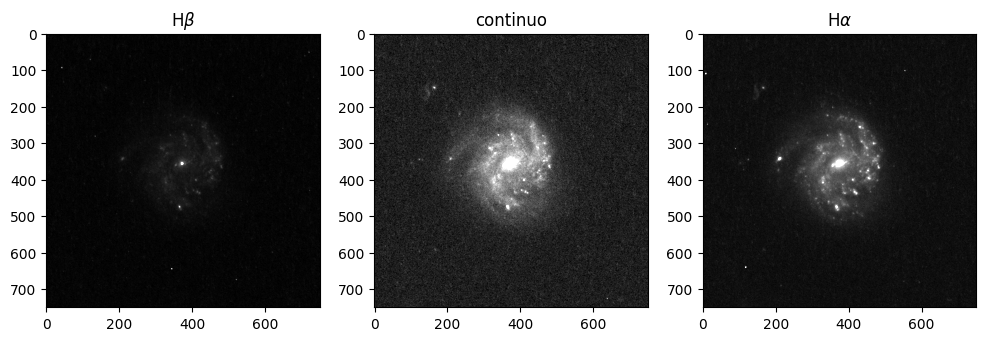

In [17]:
# make the pictures bigger
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

# one row of three pictures
fig, axes = plt.subplots(1,3)
b_ax, g_ax, r_ax = axes

# plot the data
# adjust the vmax for contrast
r_ax.imshow(image_r,cmap='gray',vmin=0,vmax=.1)
g_ax.imshow(image_g,cmap='gray',vmin=0,vmax=.1)
b_ax.imshow(image_b,cmap='gray',vmin=0,vmax=.1)

# label the images
r_ax.set_title(r'H$\alpha$')
g_ax.set_title('continuo')
b_ax.set_title(r'H$\beta$')

plt.show()

Pick your favorite colors for each of these images.

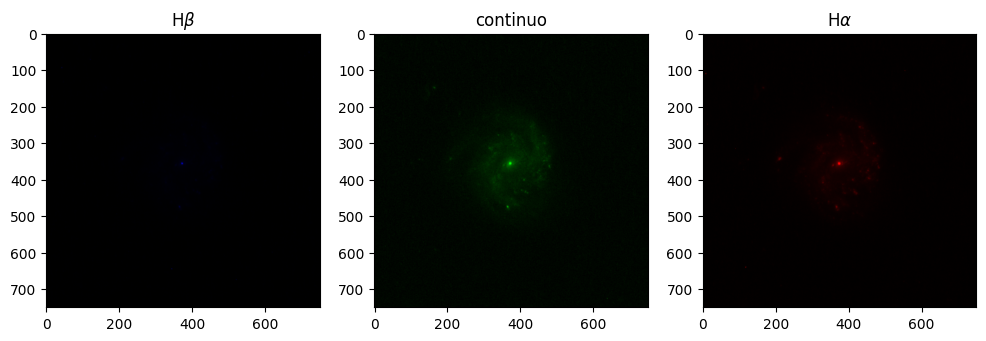

In [18]:
from astropy.visualization import make_lupton_rgb


fig, axes = plt.subplots(1,3)
b_ax, g_ax, r_ax = axes


# Pick your favorite colors using the RGB codes from 
# an online color picker like
# https://coolors.co
c1 = np.array([255,71,170])/255 # wild strawberry
c2 = np.array([160,108,213])/255 # amethyst
c3 = np.array([255,255,0])/255 # yellow


c1 = np.array([255,0,0])/255 # red
c2 = np.array([0,255,0])/255 # green
c3 = np.array([0,0,255])/255 # blue


# convert grayscale to color
r_image = make_lupton_rgb(
    c1[0]*image_r,
    c1[1]*image_r,
    c1[2]*image_r, stretch=0.5)

g_image = make_lupton_rgb(
    c2[0]*image_g,
    c2[1]*image_g,
    c2[2]*image_g, stretch=0.5)

b_image = make_lupton_rgb(
    c3[0]*image_b,
    c3[1]*image_b,
    c3[2]*image_b, stretch=0.5)

# plot the data
r_ax.imshow(r_image)
g_ax.imshow(g_image)
b_ax.imshow(b_image)

# label the images
r_ax.set_title(r'H$\alpha$')
g_ax.set_title('continuo')
b_ax.set_title(r'H$\beta$')


plt.show()

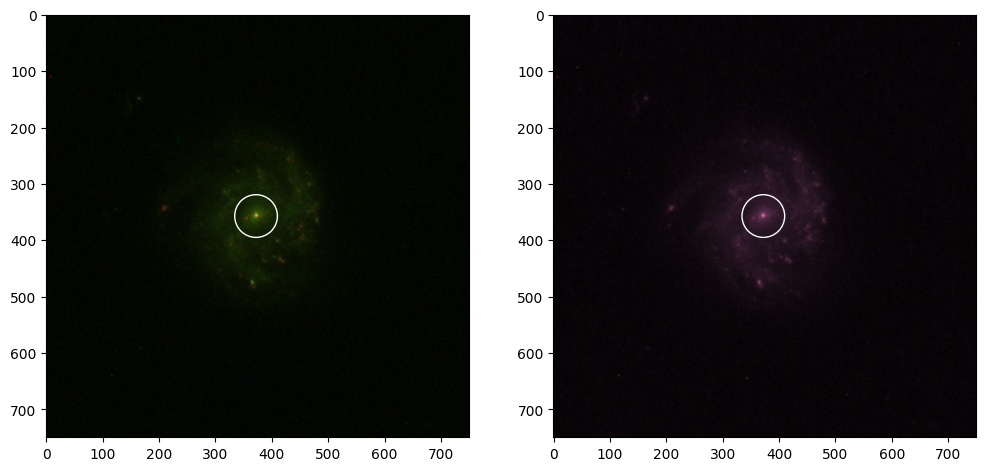

In [19]:
# We will draw a circle to represent the part
# of the image recorded by the spectrogram
from matplotlib.patches import Circle

arcsec2pix = 0.0396 # arcsec/px
diameter = 3 # arcsec
radius = 0.5*diameter/arcsec2pix # px    
center =(372,357) # px


# one row of two plots side by side
fig, axes = plt.subplots(1,2)
default, custom = axes

### Default visualization
r = np.array([255,0,0])/255 # red
g = np.array([0,255,0])/255 # green
b = np.array([0,0,255])/255 # blue

# calculate the default visualization
default_image = make_lupton_rgb(
    r[0]*image_r + g[0]*image_g + b[0]*image_b,
    r[1]*image_r + g[1]*image_g + b[1]*image_b,
    r[2]*image_r + g[2]*image_g + b[2]*image_b, stretch=0.5)
# display the image
default.imshow(default_image)
# draw a circle on the image representing the SDSS fiber used to take the spectrum
circ = Circle(center,radius,linewidth=1,fill=False,color='white')
default.add_patch(circ)


### custom visualization

# Pick your favorite colors using the RGB codes from 
# an online color picker like
# https://coolors.co
c1 = np.array([255,71,170])/255 # wild strawberry
c2 = np.array([160,108,213])/255 # amethyst
c3 = np.array([255,255,0])/255 # yellow

# Adjust the relative brightness of each color
ratios = np.array([1,1,1])
c1 = c1 * ratios[0]*3/ratios.sum()
c2 = c2 * ratios[1]*3/ratios.sum()
c3 = c3 * ratios[2]*3/ratios.sum()

# calculate the custom visualization
custom_image = make_lupton_rgb(
    c1[0]*image_r + c2[0]*image_g + c3[0]*image_b,
    c1[1]*image_r + c2[1]*image_g + c3[1]*image_b,
    c1[2]*image_r + c2[2]*image_g + c3[2]*image_b, stretch=0.5)
# display the custom image
custom.imshow(custom_image)
# draw a circle on the image
circ = Circle(center,radius,linewidth=1,fill=False,color='white')
custom.add_patch(circ)

# Print the images to the screen
plt.show()

How did we find the center of the circle? We found the brightest pixel.

In [20]:
np.where(image_b == np.amax(image_b))

(array([357]), array([372]))

The brightest pixel is at (372, 357).